In [1]:
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import io as sio

%matplotlib inline

In [2]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = mat.get('X')
X.shape

(5000, 1024)

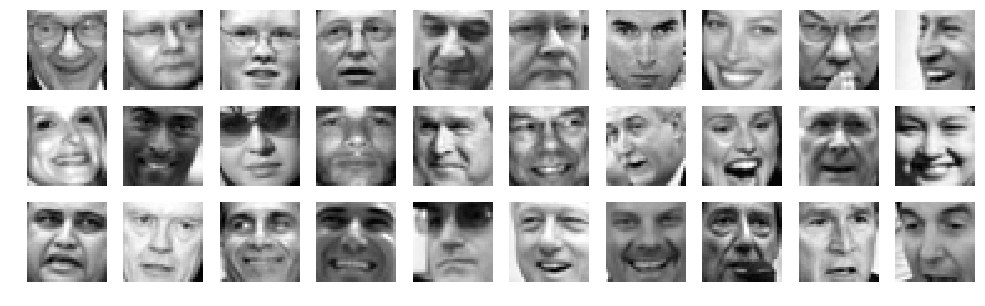

In [4]:
plt.rcParams['figure.figsize'] = (17, 5) 
plt.rcParams['image.cmap'] = 'gray'
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.axis('off')
    plt.imshow(X[i].reshape(32, 32).T)

In [5]:
X_scaler = StandardScaler()
X_norm = X_scaler.fit_transform(X)

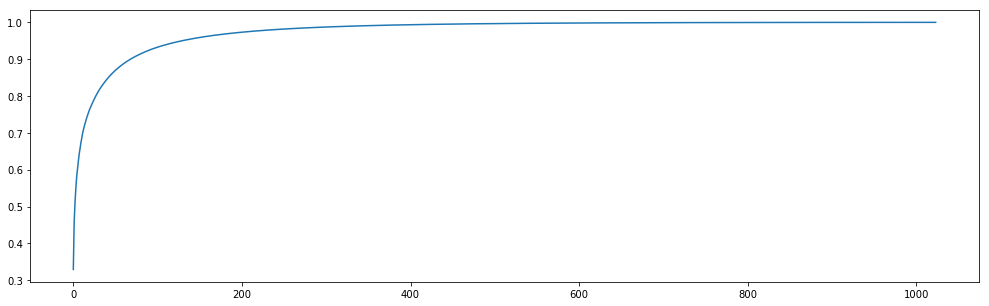

In [10]:
pca = PCA(n_components=1024)
pca.fit(X_norm)

retain_list = []
for i in range(1024):
    retain_list.append(pca.explained_variance_ratio_[:i + 1].sum())
    
plt.plot(retain_list)

In [14]:
pca = PCA(n_components=500)
X_norm_reduce = pca.fit_transform(X_norm)
X_norm_recover = pca.inverse_transform(X_norm_reduce)
pca.explained_variance_ratio_.sum()

0.99658145630311235

In [15]:
X_recover = X_scaler.inverse_transform(X_norm_recover)

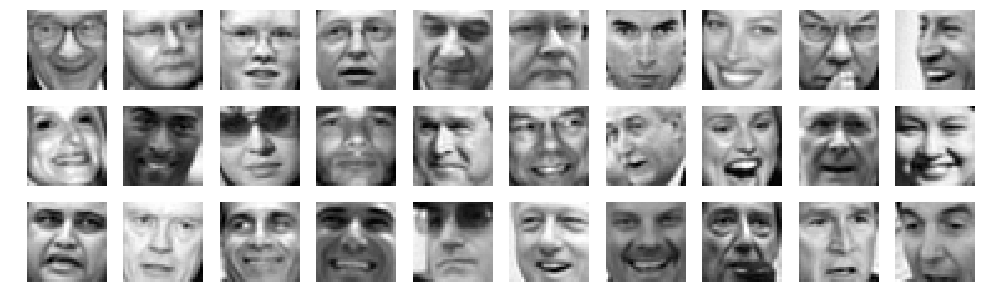

In [16]:
plt.rcParams['figure.figsize'] = (17, 5) 
plt.rcParams['image.cmap'] = 'gray'
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_recover[i].reshape(32, 32).T)